In [3]:
import pandas as pd

# Load the dataset
file_path = "/content/exchange_rate.csv"
data = pd.read_csv(file_path, parse_dates=['date'])

# Display the first few rows of the dataset
data.head()


,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


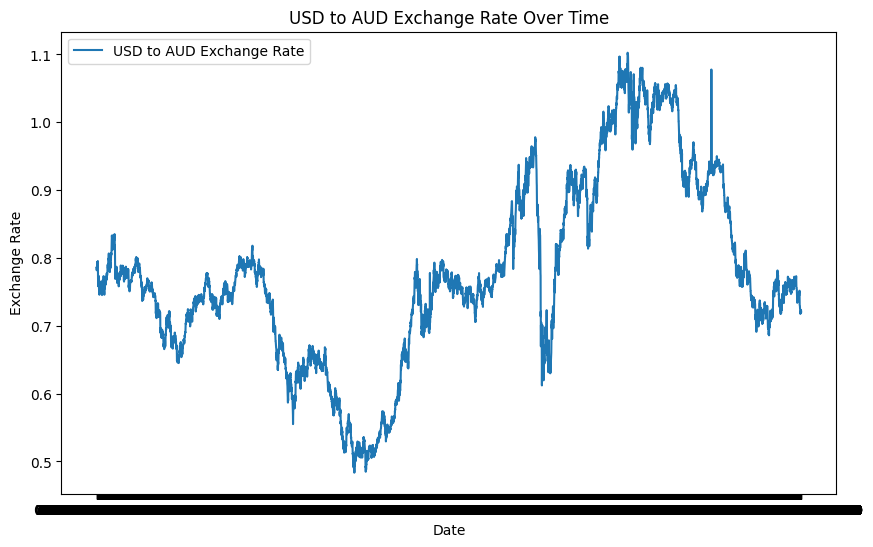

In [4]:
import matplotlib.pyplot as plt

# Set the date as the index
data.set_index('date', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print(f'Missing values:\n{missing_values}')

# If there are missing values, let's handle them
# For simplicity, we'll use forward-fill to handle any missing data
data.fillna(method='ffill', inplace=True)

# Verify if any missing values are left
missing_values_after = data.isnull().sum()
print(f'Missing values after preprocessing:\n{missing_values_after}')


Missing values:
Ex_rate    0
dtype: int64
Missing values after preprocessing:
Ex_rate    0
dtype: int64


<ipython-input-5-9e1dacee7f04>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


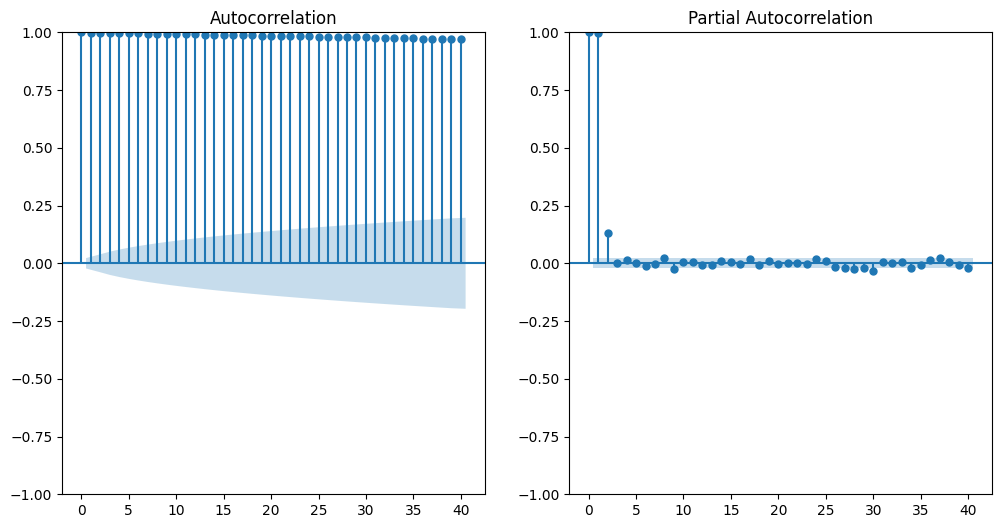

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['Ex_rate'], ax=plt.gca(), lags=40)
plt.subplot(122)
plot_pacf(data['Ex_rate'], ax=plt.gca(), lags=40)
plt.show()


In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(data['Ex_rate'], order=(1, 0, 1))  # Replace p, d, q with actual values based on ACF/PACF analysis
arima_result = model.fit()

# Summarize the ARIMA model
print(arima_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 0, 1)   Log Likelihood               28055.782
Date:                Sat, 10 Aug 2024   AIC                         -56103.563
Time:                        19:36:32   BIC                         -56075.826
Sample:                             0   HQIC                        -56094.044
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.089      8.711      0.000       0.602       0.952
ar.L1          0.9993      0.000   2311.171      0.000       0.998       1.000
ma.L1         -0.1311      0.002    -56.028      0.0

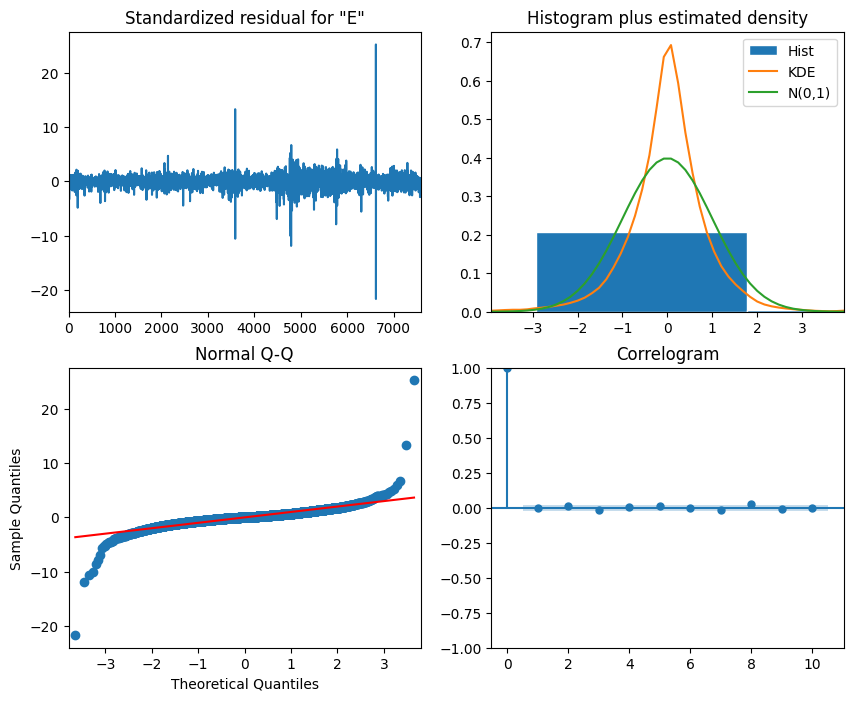

In [9]:
arima_result.plot_diagnostics(figsize=(10, 8))
plt.show()


In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/exchange_rate.csv')

# Convert the 'Date' column to datetime format without time zone information
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Set the 'Date' column as the index
data.set_index('date', inplace=True)

# Drop any rows with NaT (Not a Time) in the Date column
data.dropna(inplace=True)


In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Exponential Smoothing model
# Choose appropriate seasonal, trend, and damping parameters
model = ExponentialSmoothing(data['Ex_rate'], seasonal='add', trend='add', seasonal_periods=12)
hw_result = model.fit()

# Summary of the model
print(hw_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.574
Trend:                         Additive   BIC                         -77513.625
Seasonal:                      Additive   AICC                        -77624.483
Seasonal Periods:                    12   Date:                 Sat, 10 Aug 2024
Box-Cox:                          False   Time:                         19:45:51
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8702071                alpha                 True
smoothing_trend          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


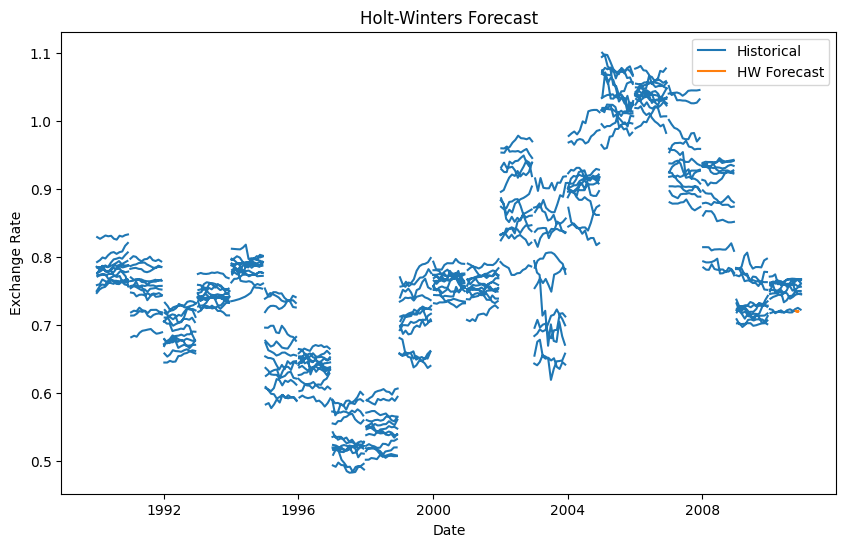

In [20]:
hw_forecast = hw_result.forecast(steps=30)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'], label='Historical')
plt.plot(forecast_index, hw_forecast, label='HW Forecast')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate error metrics
arima_mae = mean_absolute_error(data['Ex_rate'][-30:], forecast_values)
arima_rmse = mean_squared_error(data['Ex_rate'][-30:], forecast_values, squared=False)
hw_mae = mean_absolute_error(data['Ex_rate'][-30:], hw_forecast)
hw_rmse = mean_squared_error(data['Ex_rate'][-30:], hw_forecast, squared=False)

print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}')
print(f'Holt-Winters MAE: {hw_mae}, RMSE: {hw_rmse}')


ARIMA MAE: 0.012631693954477196, RMSE: 0.016754007437999097
Holt-Winters MAE: 0.013017654522635458, RMSE: 0.017245999955208903
